# 1.4 Линейная модель. Понятие переобучения

### Подвиг 4
_Поиск эмпирического риска среднеквадратичного функционала потерь_

In [13]:
import numpy as np

np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1

size_train = len(x)  # размер выборки
w = [0.5, -0.3]  # коэффициенты модели
model_a = lambda m_x, m_w: (m_w[1] * m_x + m_w[0])  # модель
loss = lambda ax, y: (ax - y) ** 2 # квадратическая функция потерь

y = model_a(x, w) + np.random.normal(0, 0.1, len(x)) # целевые значения


In [26]:
Q = loss(model_a(x, w), y).sum() / size_train
Q

0.010469526728196498

### Подвиг 5
_Поиск коэффициентов линейной регрессии w1, w2_

In [36]:
import numpy as np
import pandas as pd
np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1

model_a = lambda xx, ww: (ww[0] + ww[1] * xx) # модель

Y = -5.2 + 0.7 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

In [63]:
X = np.array([[1, i] for i in x])
product_mat = X.T.dot(X)
invers_mat = np.linalg.inv(product_mat)
product_inv_mat = invers_mat.dot(X.T)
w = product_inv_mat.dot(Y)

### Подвиг 7
_Поиск коэффициентов линейной регрессии w0, w1, w2, w3, для функции f(x) = w0 + w1*x + w2*x^2 + w3*x^3_

In [69]:
import numpy as np

np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx + ww[2] * xx ** 2 + ww[3] * xx ** 3) # модель
Y = np.sin(x * 5) + 2 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

X = np.array([[1, xx, xx**2, xx**3] for xx in x]) # обучающая выборка для поиска коэффициентов w модели a

In [70]:
product_mat = X.T.dot(X)
invers_mat = np.linalg.inv(product_mat)
product_inv_mat = invers_mat.dot(X.T)
w = product_inv_mat.dot(Y)

In [74]:
w = [2/3, -1, 3]


# 1.6 Уравнение гиперплоскости в задачах бинарной классификации

### Подвиг 7
_Классифицировать объекты выборки_

In [78]:
import numpy as np

x_test = [(5, -3), (-3, 8), (3, 6), (0, 0), (5, 3), (-3, -1), (-3, 3)]
# здесь продолжайте программу

In [88]:
w = [33/13, -9/13, -1]
sign = lambda i: 1 if i < 0 else (0 if i == 0 else -1)
# или используем функцию готовую np.sign
predict = [sign(w[0] + x_test[i][0] * w[1] + x_test[i][1] * w[2]) for i in range(len(x_test))]

In [89]:
predict

[-1, 1, 1, -1, 1, -1, -1]

# 1.7 Решение простой задачи бинарной классификации

### Подвиг 3
_Вычислите значения отступов (margin) для образов_

In [125]:
import numpy as np

w = np.array([15/7, -9/7, -1])
x_test = np.array([[-8, -4], [-2, 2], [4, 8], [6, 3]]) # done
y_test = np.array([1, 1, -1, -1])                      # done

# здесь продолжайте программу


In [126]:
margin = [((w[0] + w[1]*x_test[i][0] + w[2]*x_test[i][1]) * y_test[i]) for i in range(len(x_test))]

In [127]:
margin

[16.42857142857143, 2.7142857142857144, 11.0, 8.571428571428573]

### Подвиг 4
_Вычислите значения отступов (margin) для образов_

In [173]:
import numpy as np

w = np.array([-8/3, -2/3, 1])
x_test = np.array([(-5, 2), (-4, 6), (3, 2), (3, -3), (5, 5), (5, 2), (-1, 3)])
y_test = np.array([1, 1, 1, -1, -1, -1, -1])                     



margin = [((w[0] + w[1]*x_test[i][0] + w[2]*x_test[i][1]) * y_test[i]) for i in range(len(x_test))]

In [174]:
func = lambda i: 1 if i < 0 else 0

In [175]:
Q = sum([func(x) for x in margin])

In [176]:
Q

2

In [178]:
import numpy as np

x_test = np.array([(-5, 2), (-4, 6), (3, 2), (3, -3), (5, 5), (5, 2), (-1, 3)])
y_test = np.array([1, 1, 1, -1, -1, -1, -1])
w = np.array([-8/3, -2/3, 1])

# здесь продолжайте программу
margin = [((w[0] + w[1]*x_test[i][0] + w[2]*x_test[i][1]) * y_test[i]) for i in range(len(x_test))]
func = lambda i: 1 if i < 0 else 0
Q = sum([func(x) for x in margin])

In [182]:
margin

[2.6666666666666665,
 6.0,
 -2.666666666666666,
 7.666666666666666,
 1.0,
 4.0,
 -1.0]

# 1.8 Функции потерь в задачах линейной бинарной классификации

### Подвиг 4
_вычислить значение показателя качества Q (среднего эмпирического риска)_

In [198]:
import numpy as np


def func(x):
    return 0.1 * x**2 - np.sin(x) + 0.1 * np.cos(x * 5) + 1.


# здесь объявляйте дополнительные функции (если необходимо)

w=[1.11, -0.26, 0.061, 0.0226, 0.00178] 
coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

# здесь продолжайте программу
model = lambda x: w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4
predict = [model(x) for x in coord_x]
Q = sum([(predict[x] - coord_y[x])**2 for x in range(len(predict))])/len(predict)

### Подвиг 5

In [201]:
import numpy as np


def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.


# здесь объявляйте дополнительные функции (если необходимо)

w=[-1.59, -0.69, 0.278, 0.497, -0.106] 
coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

# здесь продолжайте программу
model = lambda x: w[0] + w[1]*x + w[2]*x**2 + w[3]*np.cos(2*x) + w[4]*np.sin(2*x)
predict = [model(x) for x in coord_x]
Q = sum([abs(predict[x] - coord_y[x]) for x in range(len(predict))])/len(predict)

### Подвиг 6

In [238]:
import numpy as np

data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

# здесь продолжайте программу


In [239]:
data_x = np.array([[1] + [*x] for x in data_x])
pt = np.sum([x * y for x, y in zip(data_x, data_y)], axis=0)
xxt = np.sum([np.outer(x, x) for x in data_x], axis=0)
w = np.dot(pt, np.linalg.inv(xxt)).tolist()

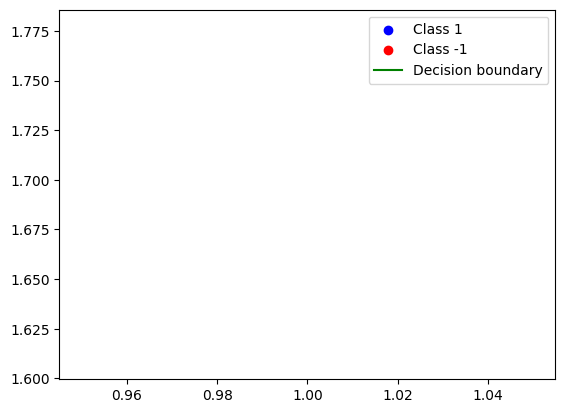

In [243]:
class_1 = data_x[data_y == 1]
class_minus_1 = data_x[data_y == -1]

x_min, x_max = np.min(data_x[:, 0]), np.max(data_x[:, 0])
x_range = np.linspace(x_min, x_max, 100)
y_range = - (w[0] + w[1] * x_range) / w[2]

plt.figure()
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
plt.scatter(class_minus_1[:, 0], class_minus_1[:, 1], color='red', label='Class -1')
plt.plot(x_range, y_range, color='green', label='Decision boundary')
plt.legend();
